In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paramétrage pour une visualisation propre
sns.set(style="whitegrid")
%matplotlib inline

In [30]:
df = pd.read_csv("../data/global_processed/global_weather.csv")

# Aperçu rapide
df.head()

,city_id,city_name,extract_date,temperature(°C),sunrise_local_hour,sunset_local_hour,humidity(%),wind(m/s),rain(mm),cloud(%),snowfall(mm),daily_score(/10)
0,6077243,montréal,2020-05-01,11.8,05:41:00,20:01:00,74,4.48,5.5,63,0.0,3.75
1,6077243,montréal,2020-05-02,10.8,05:39:00,20:02:00,57,3.36,0.0,46,0.0,7.00
2,6077243,montréal,2020-05-03,14.3,05:38:00,20:04:00,64,4.72,0.5,58,0.0,5.50
3,6077243,montréal,2020-05-04,8.6,05:36:00,20:05:00,63,4.54,0.2,81,0.0,5.00
4,6077243,montréal,2020-05-05,6.2,05:35:00,20:06:00,54,3.45,0.0,92,0.0,6.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_id             9435 non-null   int64  
 1   city_name           9435 non-null   object 
 2   extract_date        9435 non-null   object 
 3   temperature(°C)     9435 non-null   float64
 4   sunrise_local_hour  9435 non-null   object 
 5   sunset_local_hour   9435 non-null   object 
 6   humidity(%)         9435 non-null   int64  
 7   wind(m/s)           9435 non-null   float64
 8   rain(mm)            9435 non-null   float64
 9   cloud(%)            9435 non-null   int64  
 10  snowfall(mm)        9435 non-null   float64
 11  daily_score(/10)    9435 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 884.7+ KB


In [6]:
df_without_id = df.drop(columns=["city_id"])
df_without_id.describe()

,temperature(°C),humidity(%),wind(m/s),rain(mm),cloud(%),snowfall(mm),daily_score(/10)
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,15.098481,69.037414,3.170999,2.290535,53.973609,0.012651,6.115368
std,9.109565,16.035979,1.546107,6.535291,31.745170,0.110594,2.191204
min,-25.900000,9.000000,0.000000,0.000000,0.000000,0.000000,0.750000
25%,9.700000,60.000000,2.060000,0.000000,27.000000,0.000000,4.500000
50%,15.800000,73.000000,2.700000,0.000000,56.000000,0.000000,6.250000
75%,21.700000,81.000000,3.920000,1.300000,82.000000,0.000000,7.500000
max,38.100000,98.000000,14.430000,122.100000,100.000000,3.010000,10.000000


In [53]:
df.dtypes

city_id                 int64
city_name              object
extract_date           object
temperature(°C)       float64
sunrise_local_hour     object
sunset_local_hour      object
humidity(%)             int64
wind(m/s)             float64
rain(mm)              float64
cloud(%)                int64
snowfall(mm)          float64
daily_score(/10)      float64
dtype: object

In [8]:
print("Nombre de villes :", df['city_name'].nunique())

Nombre de villes : 5


In [9]:
print("Valeurs manquantes par colonne :\n", df.isnull().sum())
print("Nombre de doublons :", df.duplicated().sum())

Valeurs manquantes par colonne :
 city_id               0
city_name             0
extract_date          0
temperature(°C)       0
sunrise_local_hour    0
sunset_local_hour     0
humidity(%)           0
wind(m/s)             0
rain(mm)              0
cloud(%)              0
snowfall(mm)          0
daily_score(/10)      0
dtype: int64
Nombre de doublons : 0


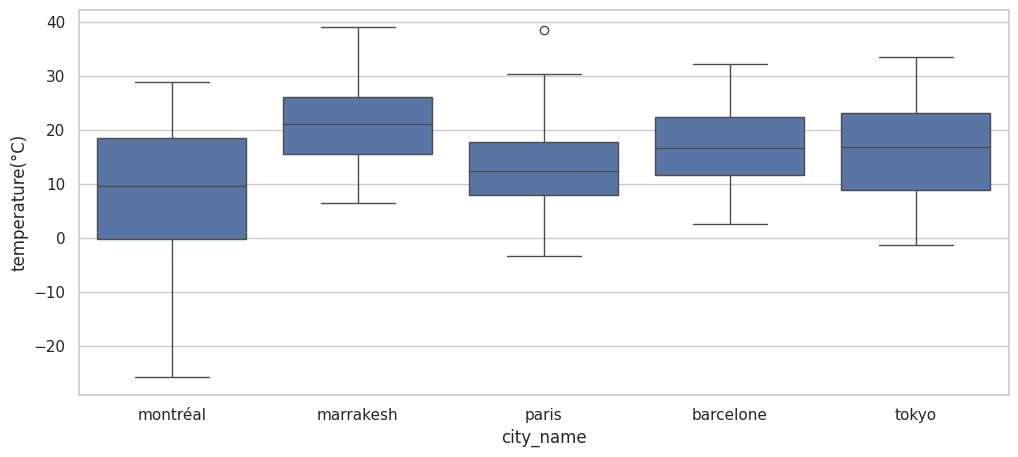

In [3]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="city_name", y="temperature(°C)")
plt.show()

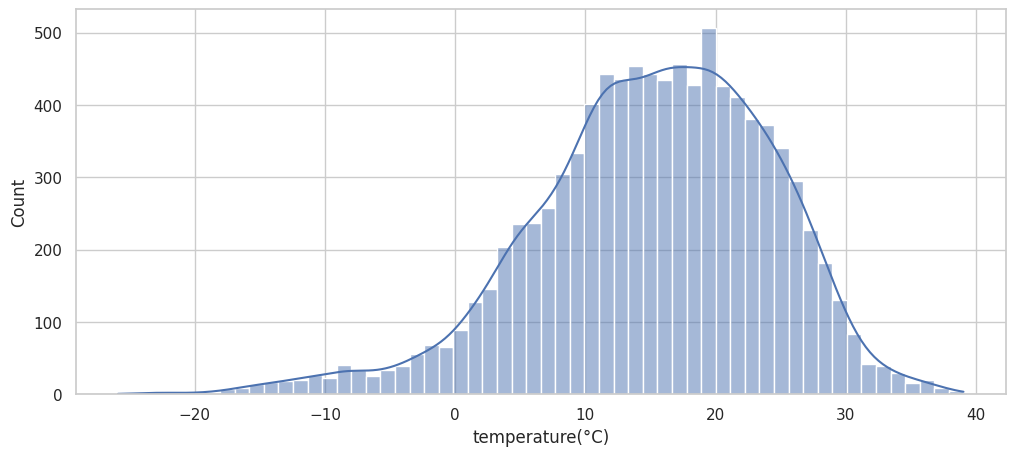

In [18]:
plt.figure(figsize=(12, 5))
sns.histplot(df['temperature(°C)'], kde=True)
plt.show()

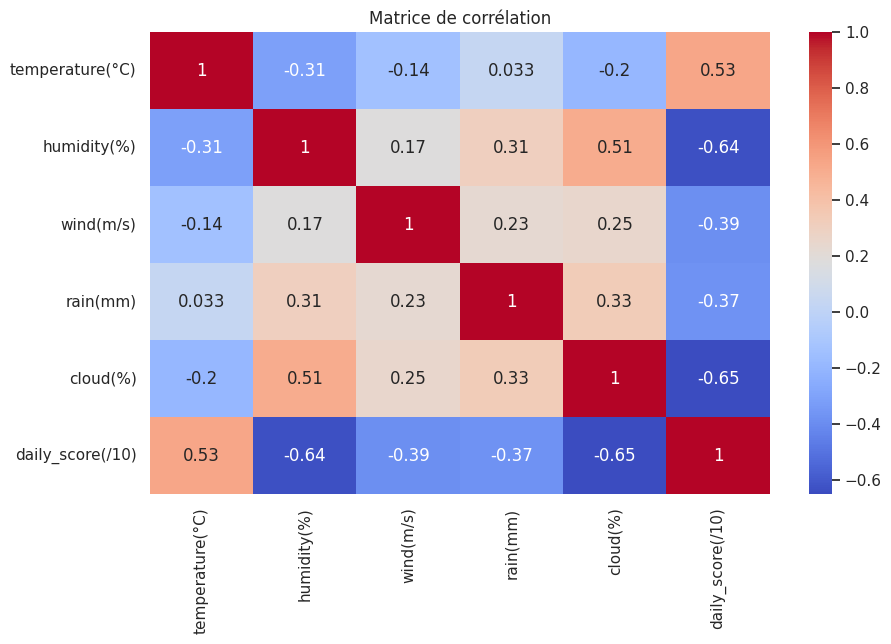

In [42]:
corr = df[['temperature(°C)','humidity(%)','wind(m/s)','rain(mm)','cloud(%)','daily_score(/10)']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

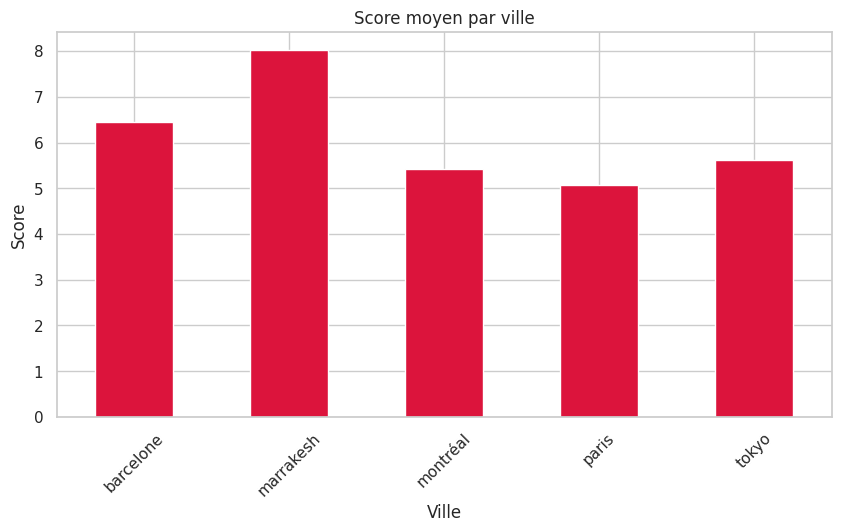

In [54]:
top_losses = df.groupby("city_name")["daily_score(/10)"].mean()

plt.figure(figsize=(10, 5))
top_losses.plot(kind='bar', color='crimson')
plt.title("Score moyen par ville")
plt.ylabel("Score")
plt.xlabel("Ville")
plt.xticks(rotation=45)
plt.show()